# London Bike Share Forecast

<center>
  <img 
    src="https://cdn-blog.seedly.sg/wp-content/uploads/2020/10/21102821/SpongeBob-and-Squidward-Cycling.gif" 
    alt="MarineGEO circle logo" width="500"/>
</center>

we are going to forecast the bike sharing demand in london, simple as that

# The Data

the data source is from kaggle, this one : https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset

im gonna use pandas profiling to see the data quickly, also here is the description on each column

- "timestamp" - timestamp field for grouping the data
- "cnt" - the count of a new bike shares
- "t1" - real temperature in C
- "t2" - temperature in C "feels like"
- "hum" - humidity in percentage
- "wind_speed" - wind speed in km/h
- "weather_code" - category of the weather
- "is_holiday" - boolean field - 1 holiday / 0 non holiday
- "is_weekend" - boolean field - 1 if the day is weekend
- "season" - category field meteorological seasons: 
> - 0-spring
> - 1-summer
> - 2-fall
> - 3-winter

- "weathe_code" category description:
> - 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
> - 2 = scattered clouds / few clouds 
> - 3 = Broken clouds 
> - 4 = Cloudy 
> - 7 = Rain/ light Rain shower/ Light rain 
> - 10 = rain with thunderstorm 
> - 26 = snowfall 
> - 94 = Freezing Fog

ok now lets import the library and the data

In [ ]:
!pip install pandas-profiling --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

DATA_URL = 'https://raw.githubusercontent.com/sir-hadi/My-AI-ML-DS-Projects/main/London%20Bike%20Share%20Forecast/london_merged.csv'

In [ ]:
df = pd.read_csv(DATA_URL)

In [ ]:
profile = ProfileReport(df, title='London Bike Share Forecast')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

nice, there is no missing data

and as we can see in the alerts tab, it says cnt is correlated with hum, which is interesting. this rises the question that can hum be enough to predict cnt. but if we scroll down to the correlations section, we can see that they are negatively correlated

so lets change the timestamp to datetime and also set it into its index

In [ ]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.set_index("timestamp")

df.head()

cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  
timestamp                                            
2015-01-04 00:00:00         0.0         1.0     3.0  
2015-01-04 01:00:00         0.0         1.0     3.0  
2015-01-04 02:00:00         0.0         1.0     3.0  
2015-01-04 03:00:00         0.0         1.0     3.0  
2015-01-04 04:00:00         0.0         1.0     3.0

we want to know the range of the timestamp so lets called min and max for that

In [ ]:
df.index.min()

Timestamp('2015-01-04 00:00:00')

In [ ]:
df.index.max()

Timestamp('2017-01-03 23:00:00')

after that will create some feature that we can extract using the datetime object methods, this should come in handy to view the data in different ways

and its more features

In [ ]:
df["hour"] = df.index.hour
df["day_of_month"] = df.index.day
df["day_of_week"]  = df.index.dayofweek
df["month"] = df.index.month
df.head()

cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  hour  day_of_month  \
timestamp                                                                 
2015-01-04 00:00:00         0.0         1.0     3.0     0             4   
2015-01-04 01:00:00         0.0         1.0     3.0     1             4   
2015-01-04 02:00:00         0.0         1.0     3.0     2             4   
2015-01-04 03:00:00         0.0         1.0     3.0     3             4   
2015-01-04 04:00:00         0.0         1.0     3.0     4             4   

                     day_of_week  month  
timestamp                                
2015-01-04 00:00:00            6      1  
2015-01-04 01:00:00            6      1  
2015-01-04 02:00:00            6      1  
2015-01-04 03:00:00            6      1  
2015-01-04 04:00:00            6      1

# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

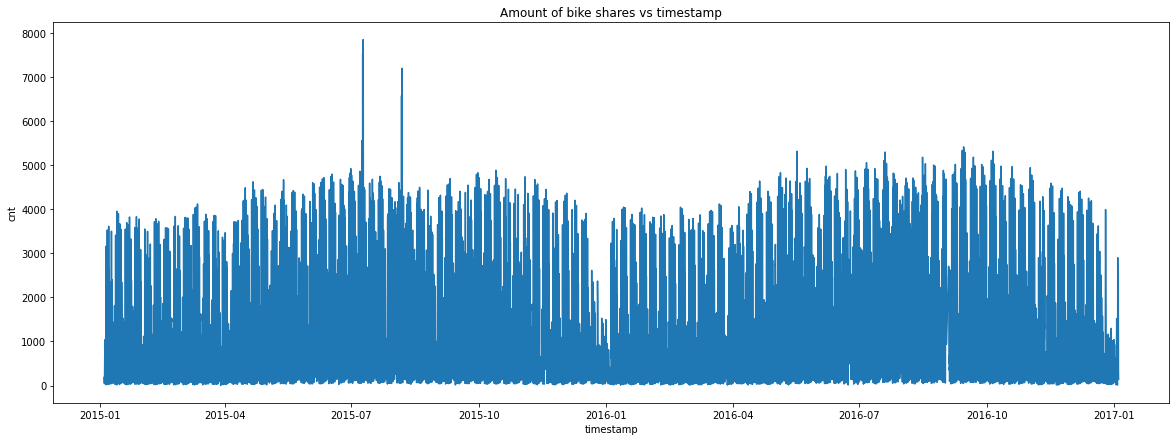

In [ ]:
plt.figure(figsize=(20, 7))
sns.lineplot(x=df.index, y=df.cnt)
plt.title("Amount of bike shares vs timestamp")
plt.show()

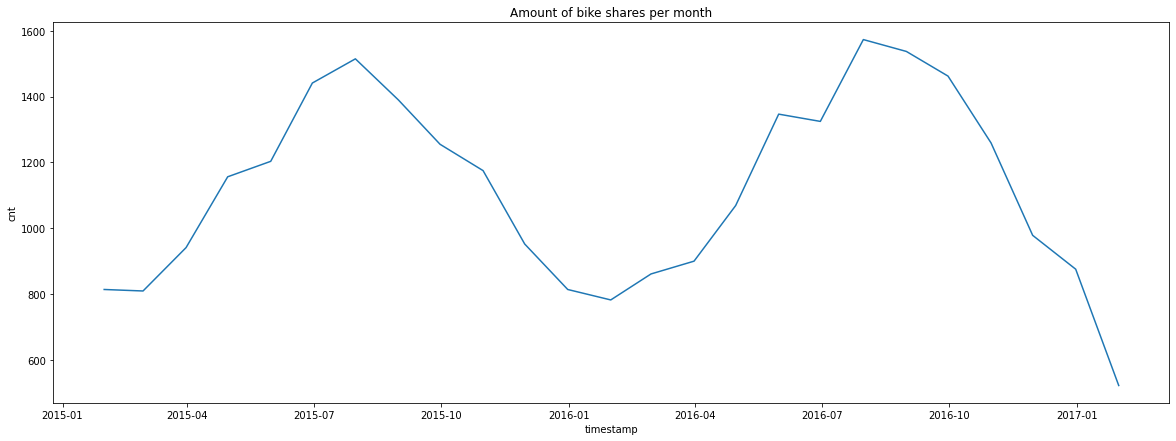

In [ ]:
# Resample timeseries, for plotting timeseries month frequency
df_by_month = df.resample("M").mean()

plt.figure(figsize=(20,7))
sns.lineplot(x=df_by_month.index,y=df_by_month.cnt)
plt.title("Amount of bike shares per month")
plt.show()

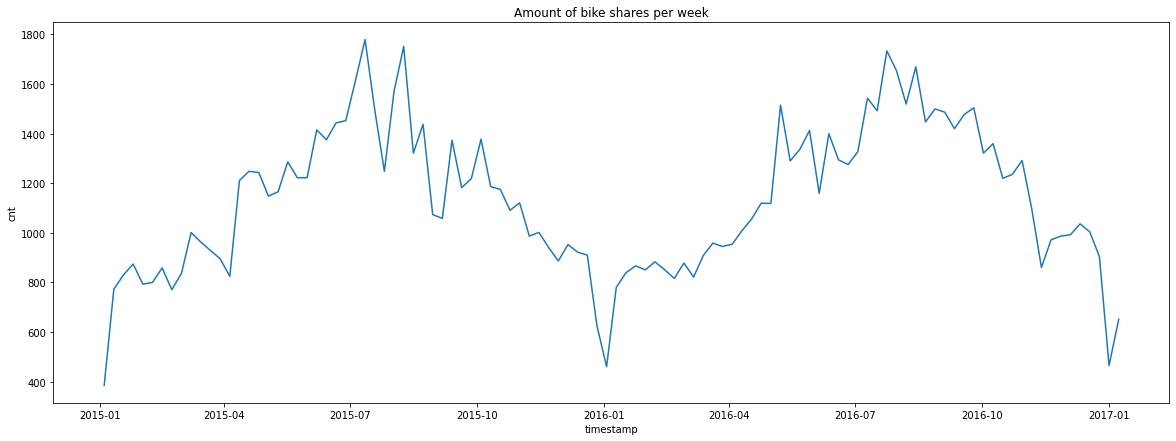

In [ ]:
# Resample timeseries, for plotting timeseries week frequency
df_by_day = df.resample("W").mean()

plt.figure(figsize=(20,7))
sns.lineplot(x=df_by_day.index,y=df_by_day.cnt)
plt.title("Amount of bike shares per week")
plt.show()

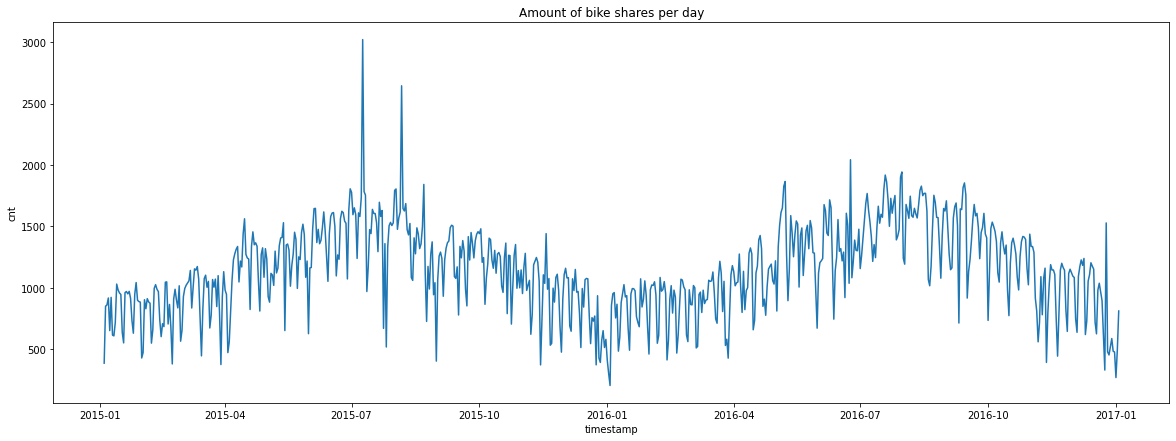

In [ ]:
# Resample timeseries, for plotting timeseries month frequency
df_by_day = df.resample("D").mean()

plt.figure(figsize=(20,7))
sns.lineplot(x=df_by_day.index,y=df_by_day.cnt)
plt.title("Amount of bike shares per day")
plt.show()

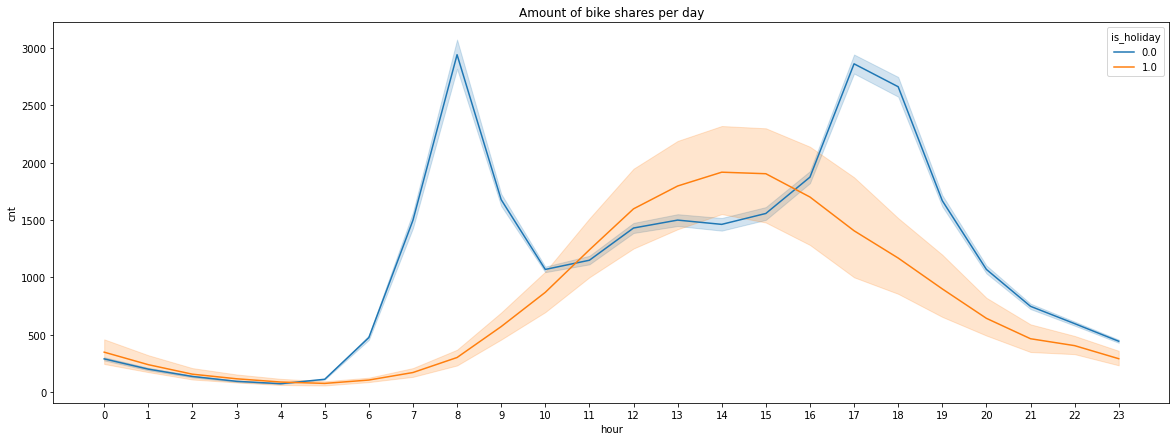

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(x=df.hour,y=df.cnt,hue=df.is_holiday)
plt.title("Amount of bike shares per day")
plt.xticks(df.hour.unique())
plt.show()

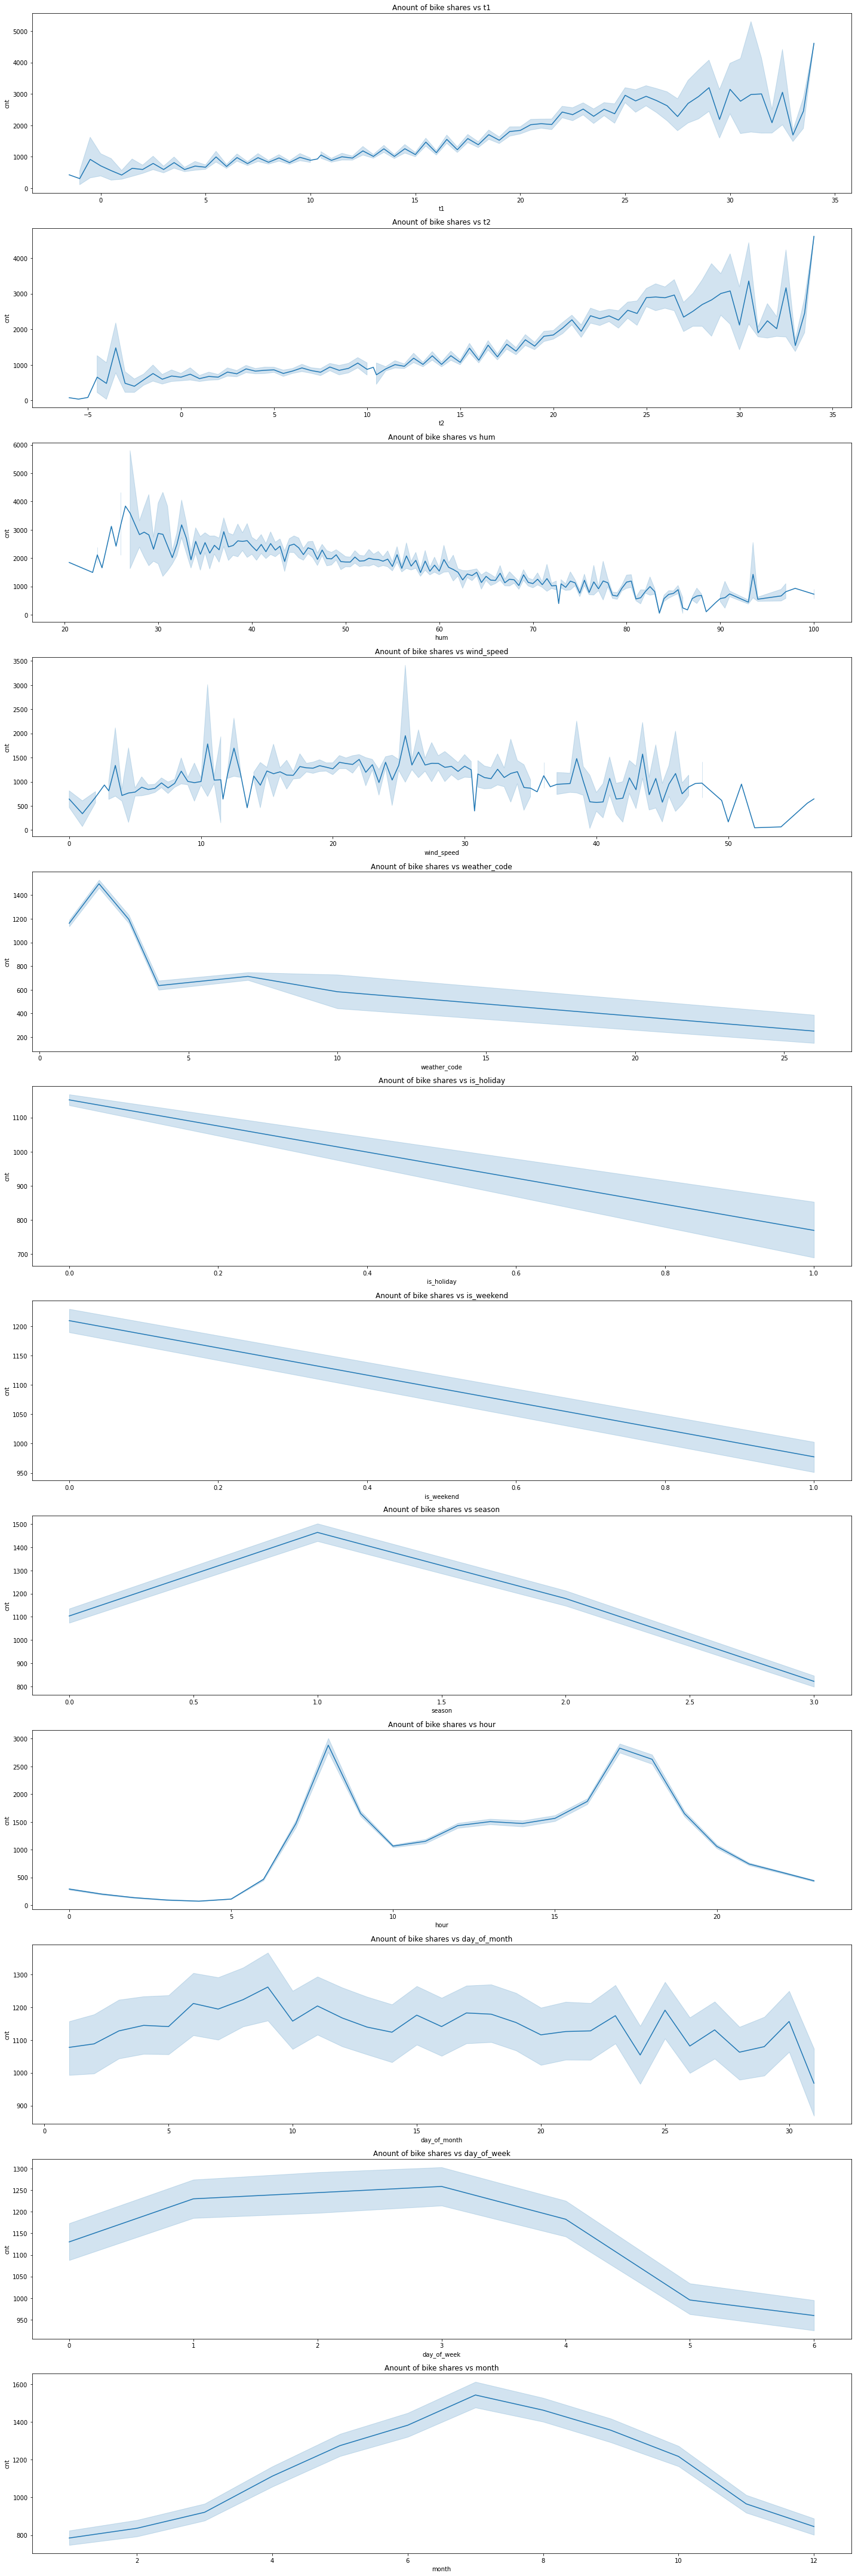

In [ ]:
target_col = list(df.columns)
target_col.remove('cnt')
fig, axs = plt.subplots(len(target_col),figsize=(20,len(target_col)*5))
for i in range(len(target_col)):
  sns.lineplot(x=df[target_col[i]], 
               y=df.cnt,
               ax=axs[i])
  axs[i].set_title(f'Anount of bike shares vs {target_col[i]}')
plt.tight_layout()
plt.show()

by these plot we can see that if there is a lower temp, if its winter season or that is raining (weather code 7 and 10), then the amount of bike share is low, on the contrary if its not all those condition then the amount will increase and there will be many bike shares, we can see that if weathe_code is 1 or 2, being those weather code having the most amount of bike shares

also holiday give us a pattern also, if its not a holiday then the amount of bike share is high, and vice versa

# Modeling

we will create two model:
1. model that predict the current values, it can be use to predict the next hours but need to find data the next data of others features (a bit more explanation in its section which is the next section)
2. timeseries forecast, it will use time as input and output the amount of bike share for thet inputed time

## Quick Modelling (More of a prediction then forecast/timeseries)

lets set the data so we predict it per hour, like every row in the data is every hour

in here we predict the current hour, if we want to predict the next hour we need a model that use time as input rather than the feature we have, but i think we can predict the next hour, cause there is features like seasons, hour, day_of_month, day_of_week, month, is_holiday, is weekend. but the features like hum, t1, t2, wind_speed, weather_code is something we cant generate the actual value, but we can get those value from a third party weather forecast or our own weather forecast prediction. so we can use this type of modeling to predict the next hours, but we just have to get those values first

so, like i said before in this notebook we will create this type of prediction and also the timeseries base, using time as input

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
# we reset the index because we want to make timestamp as column now, not index
data = shuffle(df.reset_index().copy(),random_state=2023)
data.head(3)

timestamp   cnt    t1    t2   hum  wind_speed  weather_code  \
13515 2016-07-23 15:00:00  3407 26.00 26.00 51.00       15.00          1.00   
7520  2015-11-14 16:00:00   491 12.50 12.50 88.00       28.00          7.00   
10806 2016-04-01 02:00:00   100  5.00  5.00 84.00        2.00          1.00   

       is_holiday  is_weekend  season  hour  day_of_month  day_of_week  month  
13515        0.00        1.00    1.00    15            23            5      7  
7520         0.00        1.00    2.00    16            14            5     11  
10806        0.00        0.00    0.00     2             1            4      4

In [ ]:
X = data.drop(['timestamp','cnt'],axis=1)
y = data['cnt']

In [ ]:
# i forgot that train_test_split has a shiffle parametes/arguments in the function
# should use that for a cleaner code i think
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

### Using Lazy Predict

uses to much ram and made colab shutdown

In [ ]:
# !pip install lazypredict

In [ ]:
# from lazypredict.Supervised import LazyRegressor

In [ ]:
# reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )

In [ ]:
# models,predictions = reg.fit(X_train, X_test, y_train, y_test)

### XGBoost

In [ ]:
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_log_error,mean_squared_error, make_scorer

In [ ]:
xgbmodel = XGBRegressor()
xgbmodel.fit(X_train,y_train)

preds = xgbmodel.predict(X_test)

[03:34:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE:",rmse)

RMSE: 361.65206931842897


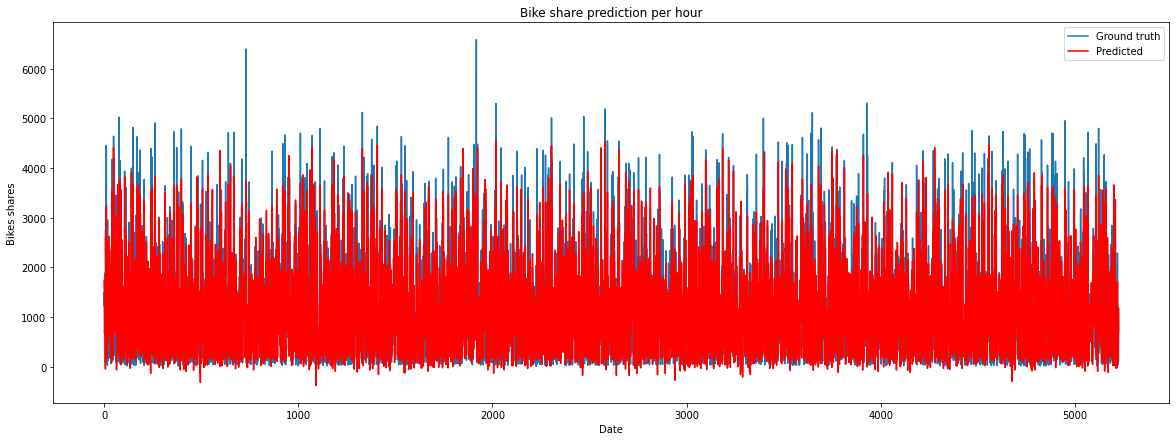

In [ ]:
plt.figure(figsize=(20,7))
range_x = np.arange(preds.shape[0])
sns.lineplot(x=range_x, y=y_test)
sns.lineplot(x=range_x, y=preds,color='red')

plt.title('Bike share prediction per hour')
plt.xlabel(xlabel='Date')
plt.ylabel(ylabel='Bikes shares')
plt.legend(['Ground truth', 'Predicted'])

plt.show()

In [ ]:
last_to_pred = df.tail(1000).drop(['cnt'], axis=1)
last_to_pred

t1    t2   hum  wind_speed  weather_code  is_holiday  \
timestamp                                                                     
2016-11-23 08:00:00  7.00  6.00 90.00        6.00          2.00        0.00   
2016-11-23 09:00:00  8.00  7.00 82.00        6.50          1.00        0.00   
2016-11-23 10:00:00  8.00  7.00 84.50        6.50          1.00        0.00   
2016-11-23 11:00:00  9.50  9.00 79.00        6.50          2.00        0.00   
2016-11-23 12:00:00 10.50 10.00 74.00        9.00          2.00        0.00   
...                   ...   ...   ...         ...           ...         ...   
2017-01-03 19:00:00  5.00  1.00 81.00       19.00          3.00        0.00   
2017-01-03 20:00:00  5.00  1.00 81.00       21.00          4.00        0.00   
2017-01-03 21:00:00  5.50  1.50 78.50       24.00          4.00        0.00   
2017-01-03 22:00:00  5.50  1.50 76.00       23.00          4.00        0.00   
2017-01-03 23:00:00  5.00  1.00 76.00       22.00          2.00        0.00   

                     is_weekend  season  hour  day_of_month  day_of_week  \
timestamp                                                                  
2016-11-23 08:00:00        0.00    2.00     8            23            2   
2016-11-23 09:00:00        0.00    2.00     9            23            2   
2016-11-23 10:00:00        0.00    2.00    10            23            2   
2016-11-23 11:00:00        0.00    2.00    11            23            2   
2016-11-23 12:00:00        0.00    2.00    12            23            2   
...                         ...     ...   ...           ...          ...   
2017-01-03 19:00:00        0.00    3.00    19             3            1   
2017-01-03 20:00:00        0.00    3.00    20             3            1   
2017-01-03 21:00:00        0.00    3.00    21             3            1   
2017-01-03 22:00:00        0.00    3.00    22             3            1   
2017-01-03 23:00:00        0.00    3.00    23             3            1   

                     month  
timestamp                   
2016-11-23 08:00:00     11  
2016-11-23 09:00:00     11  
2016-11-23 10:00:00     11  
2016-11-23 11:00:00     11  
2016-11-23 12:00:00     11  
...                    ...  
2017-01-03 19:00:00      1  
2017-01-03 20:00:00      1  
2017-01-03 21:00:00      1  
2017-01-03 22:00:00      1  
2017-01-03 23:00:00      1  

[1000 rows x 12 columns]

In [ ]:
tail_preds = xgbmodel.predict(last_to_pred)

In [ ]:
last_to_pred['cnt'] = tail_preds.round().astype('int')
last_to_pred

t1    t2   hum  wind_speed  weather_code  is_holiday  \
timestamp                                                                     
2016-11-23 08:00:00  7.00  6.00 90.00        6.00          2.00        0.00   
2016-11-23 09:00:00  8.00  7.00 82.00        6.50          1.00        0.00   
2016-11-23 10:00:00  8.00  7.00 84.50        6.50          1.00        0.00   
2016-11-23 11:00:00  9.50  9.00 79.00        6.50          2.00        0.00   
2016-11-23 12:00:00 10.50 10.00 74.00        9.00          2.00        0.00   
...                   ...   ...   ...         ...           ...         ...   
2017-01-03 19:00:00  5.00  1.00 81.00       19.00          3.00        0.00   
2017-01-03 20:00:00  5.00  1.00 81.00       21.00          4.00        0.00   
2017-01-03 21:00:00  5.50  1.50 78.50       24.00          4.00        0.00   
2017-01-03 22:00:00  5.50  1.50 76.00       23.00          4.00        0.00   
2017-01-03 23:00:00  5.00  1.00 76.00       22.00          2.00        0.00   

                     is_weekend  season  hour  day_of_month  day_of_week  \
timestamp                                                                  
2016-11-23 08:00:00        0.00    2.00     8            23            2   
2016-11-23 09:00:00        0.00    2.00     9            23            2   
2016-11-23 10:00:00        0.00    2.00    10            23            2   
2016-11-23 11:00:00        0.00    2.00    11            23            2   
2016-11-23 12:00:00        0.00    2.00    12            23            2   
...                         ...     ...   ...           ...          ...   
2017-01-03 19:00:00        0.00    3.00    19             3            1   
2017-01-03 20:00:00        0.00    3.00    20             3            1   
2017-01-03 21:00:00        0.00    3.00    21             3            1   
2017-01-03 22:00:00        0.00    3.00    22             3            1   
2017-01-03 23:00:00        0.00    3.00    23             3            1   

                     month   cnt  
timestamp                         
2016-11-23 08:00:00     11  3306  
2016-11-23 09:00:00     11  1734  
2016-11-23 10:00:00     11  1003  
2016-11-23 11:00:00     11  1100  
2016-11-23 12:00:00     11  1254  
...                    ...   ...  
2017-01-03 19:00:00      1  1257  
2017-01-03 20:00:00      1   657  
2017-01-03 21:00:00      1   463  
2017-01-03 22:00:00      1   419  
2017-01-03 23:00:00      1   340  

[1000 rows x 13 columns]

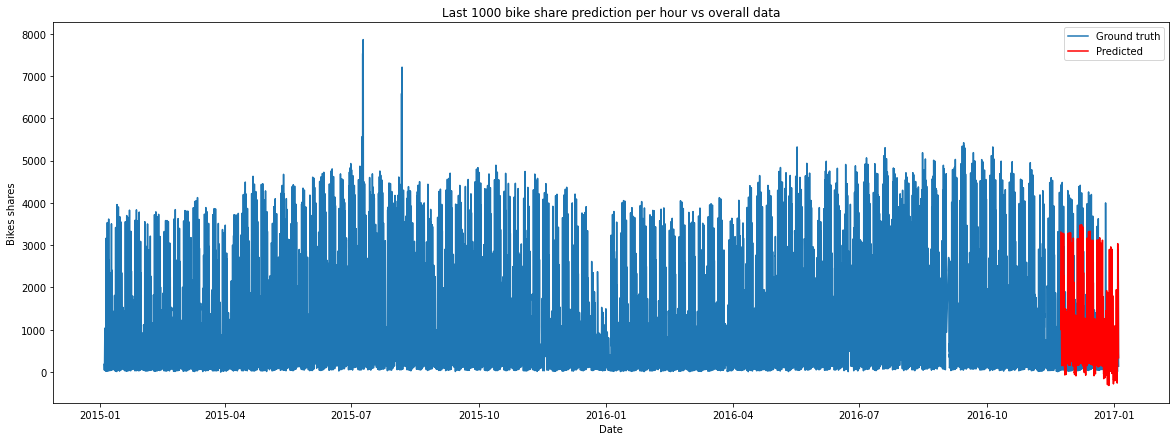

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(x=df.index, y=df.cnt)
sns.lineplot(x=last_to_pred.index, y=last_to_pred.cnt, color='red')

plt.title('Last 1000 bike share prediction per hour vs overall data')
plt.xlabel(xlabel='Date')
plt.ylabel(ylabel='Bikes shares')
plt.legend(['Ground truth', 'Predicted'])

plt.show()